In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
from io import StringIO

In [2]:
data = pd.read_csv('ethSentimet.csv')
data

,Unnamed: 0,open,high,low,close,volume,edit_count,sentiment,neg_sentiment,tomorrow,target
0,2017-11-09 00:00:00+00:00,308.644989,329.451996,307.056000,320.884003,893249984,0.900000,-0.144123,0.261111,299.252991,0
1,2017-11-10 00:00:00+00:00,320.670990,324.717987,294.541992,299.252991,885985984,0.966667,-0.177429,0.294444,314.681000,1
2,2017-11-11 00:00:00+00:00,298.585999,319.453003,298.191986,314.681000,842300992,0.966667,-0.177429,0.294444,307.907990,0
3,2017-11-12 00:00:00+00:00,314.690002,319.153015,298.513000,307.907990,1613479936,0.966667,-0.177429,0.294444,316.716003,1
4,2017-11-13 00:00:00+00:00,307.024994,328.415009,307.024994,316.716003,1041889984,1.100000,-0.209260,0.327778,337.631012,1
...,...,...,...,...,...,...,...,...,...,...,...
2410,2024-06-15 00:00:00+00:00,3479.785645,3589.887451,3473.452637,3565.549561,12733651076,0.533333,0.066103,0.108333,3620.563477,1
2411,2024-06-16 00:00:00+00:00,3566.761963,3648.093018,3541.534424,3620.563477,9878388158,0.533333,0.066103,0.108333,3511.378906,0
2412,2024-06-17 00:00:00+00:00,3622.383545,3634.285400,3468.148926,3511.378906,17838856988,0.533333,0.066103,0.108333,3483.681396,0
2413,2024-06-18 00:00:00+00:00,3510.565186,3514.177246,3371.590332,3483.681396,21022514455,0.533333,0.066103,0.108333,3539.494873,1


In [3]:
features = ['open', 'high', 'low', 'close', 'volume', 'edit_count', 'sentiment', 'neg_sentiment']
target = 'target'

X = data[features]
y = data[target]


In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [6]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
y_pred = model.predict(X_test)

In [8]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.5072463768115942
Confusion Matrix:
[[127 103]
 [135 118]]


In [9]:
import pandas as pd

# Read the CSV file
data_from_eth = pd.read_csv("eth.csv")

# Get the last row
last_row_eth = data_from_eth.iloc[-1]

print("Last row from eth.csv:")
print(last_row_eth)

Last row from eth.csv:
Date            2024-06-19 00:00:00+00:00
Open                           3482.35083
High                          3581.869629
Low                           3466.873291
Close                         3535.056885
Volume                        19571181568
Dividends                             0.0
Stock Splits                          0.0
Name: 2414, dtype: object


In [10]:
import pandas as pd

# Read the CSV file
sentiment_from_eth = pd.read_csv("ethereum_sentiment.csv")

# Get the last row
last_row_eth_sentiment = sentiment_from_eth.iloc[-1]

print("Last row from ethereum_sentiment.csv:")
print(last_row_eth_sentiment)

Last row from ethereum_sentiment.csv:
Unnamed: 0       2024-06-19
edit_count         0.533333
sentiment          0.066103
neg_sentiment      0.108333
Name: 5553, dtype: object


In [11]:
# Function to fetch the latest data for Ethereum
def fetch_latest_data():
    # This function should fetch the latest data from your real-time source
    latest_data = {
        "open": last_row_eth['Open'],
        "high": last_row_eth['High'],
        "low": last_row_eth['Low'],
        "close": last_row_eth['Close'],
        "volume": last_row_eth['Volume'],
        "edit_count": last_row_eth_sentiment['edit_count'],
        "sentiment": last_row_eth_sentiment['sentiment'],
        "neg_sentiment": last_row_eth_sentiment['neg_sentiment']
    }
    return latest_data


In [12]:
# Fetch and preprocess new data
latest_data = fetch_latest_data()
latest_df = pd.DataFrame([latest_data])
latest_df

,open,high,low,close,volume,edit_count,sentiment,neg_sentiment
0,3482.35083,3581.869629,3466.873291,3535.056885,19571181568,0.533333,0.066103,0.108333


In [13]:
latest_probabilities = model.predict_proba(latest_df)

c:\Users\SUBRAT\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function to plot probabilities
def plot_probabilities(probabilities):
    labels = ['Decrease', 'Increase']
    values = probabilities[0]

    fig, ax = plt.subplots()
    ax.barh(labels, values, color=['red', 'green'])
    ax.set_xlim(0, 1)
    ax.set_xlabel('Probability')
    ax.set_title('Probability of ethereum Price Change')

    for index, value in enumerate(values):
        ax.text(value, index, f'{value:.2f}', va='center')

    plt.show()

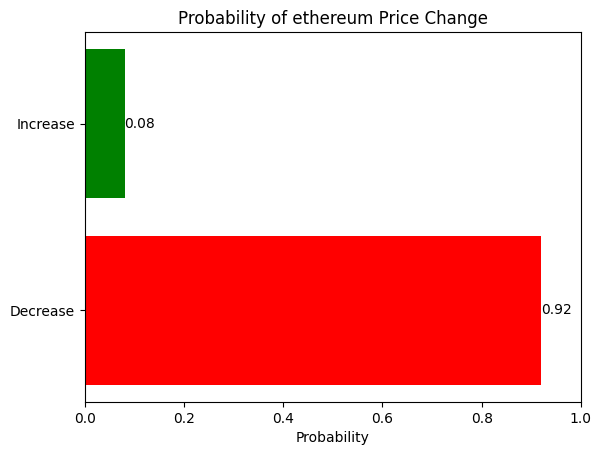

In [15]:
# Fetch the combined data
latest_data = fetch_latest_data()

# Create a DataFrame with the latest data
latest_df = pd.DataFrame([latest_data])

# Standardize the latest data
latest_X_scaled = scaler.transform(latest_df[features])

# Predict the probabilities
latest_probabilities = model.predict_proba(latest_X_scaled)

# Plot the probabilities
plot_probabilities(latest_probabilities)

In [16]:
print(f"Probability of price decrease: {latest_probabilities[0][0]:.2f}")
print(f"Probability of price increase: {latest_probabilities[0][1]:.2f}")

Probability of price decrease: 0.92
Probability of price increase: 0.08


In [17]:
import pickle 
with open('eth_prob.pkl', 'wb') as f:
    pickle.dump(model, f)